Data Preprocessing

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt as sq
from math import log as log

In [35]:
dataset = pd.read_csv(r'C:\Users\Sudeep nellur\Desktop\Datasets\UpperConfidenceBound\Ads_CTR_Optimisation.csv')

For random selection

In [36]:
import random

N = 10000 #1000 observation
d = 10 #10 ads
ads_selected = [] #list of ads which is selected 
total_reward = 0 

for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [37]:
print("total number rewards earned:",total_reward)

total number rewards earned: 1185


Visualisation

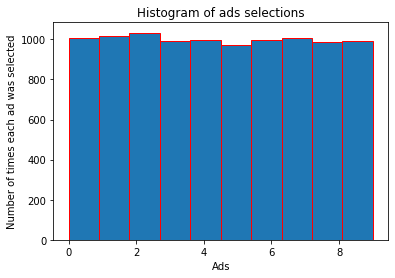

In [38]:
plt.hist(ads_selected, edgecolor='red')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.rwidth=0.85
plt.show()

Upper Confidence Bound

In [39]:
N = 10000 
d = 10
ads_selected = []
numbers_of_selections = [0] * d #vector of the "d" size 0's
sums_of_rewards = [0] * d #vector of the "d" size 0's
total_reward = 0

In [40]:
for n in range(0, N):
    ad = 0 #initial ads
    max_upper_bound = 0 #maximum upper limit
    
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = sq(3/2 * log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 
            
            '''here the code will go through 10 iteration, if the i = 0 which is less than 0 then,
               the else statement will excuted which is 10 to the power of 4000
               
               if i = 1 then it will be higher then, the algorithm will excuted, where average reward
               (the total reward by no. of selection). And the delta will the squre root of 3/2 multiplied
               by log of n + 1 by no. of selection
               
               And the upper bound is calcuted by adding average reward + delta value.
            '''
            
        if upper_bound > max_upper_bound: #for storing the maximum value for max_upper_bound
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [41]:
print(numbers_of_selections) #number of each ads got selected

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]


In [42]:
print(total_reward)

2178


In [43]:
print(sums_of_rewards) #sum of rewards for each iteration

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]


Visualisation

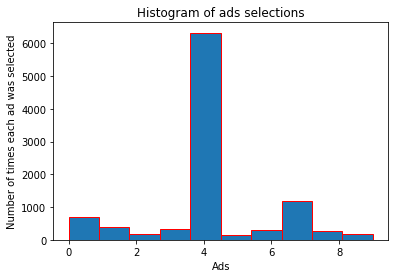

In [44]:
plt.hist(ads_selected, edgecolor='red')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()